## Bike Sharing Assigment Solution

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands


The solution is divided into the following sections:

    1. Data Exploration
    2. Data Visualisation
    3. Data Preparation
    4. Model Building and Evaluation

In [348]:
#import libraries
import numpy as np
import pandas as pd  #Data Manuplation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import statsmodels  # STats Model for manually building the model
import statsmodels.api as sm

# import scikit learn for Model Building 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [349]:
# Filetring Warnings
import warnings
warnings.filterwarnings('ignore')

#Setting option to display all columns

pd.set_option("display.max_columns",None)

In [350]:
# Import dataset
day = pd.read_csv("day.csv")

### 1. Data Exploration

In [351]:
# Shape of original day.csv
day.shape

(730, 16)

In [352]:
#top 10 rows
day.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [353]:
#show last 5 values
day.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [354]:
#column list
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [355]:
# Deatiled Summary of dataframe
# Summary: 730 rows, 16 columns, no null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [356]:
#statistics represtation of Data
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Understanding & Date Preparation usning given Data Dictionary

=========================================
#### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

In [357]:
# Assigning string values to seasons

day.loc[(day['season'] == 1) , 'season'] = 'spring'
day.loc[(day['season'] == 2) , 'season'] = 'summer'
day.loc[(day['season'] == 3) , 'season'] = 'fall'
day.loc[(day['season'] == 4) , 'season'] = 'winter'

In [358]:
day['season'].astype('category').value_counts() # Rows for each season

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [359]:
day['yr'].astype('category').value_counts() ## year (0: 2018, 1:2019)

yr
0    365
1    365
Name: count, dtype: int64

In [360]:
# Assigning string values to months

def map_months(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Calling the function to the two columns
day[['mnth']] = day[['mnth']].apply(map_months)

In [361]:
day['mnth'].astype('category').value_counts() #Monthwise count

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: count, dtype: int64

In [362]:
# Assigning string values to week days
def map_weekdays(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
day[['weekday']] = day[['weekday']].apply(map_weekdays)

In [363]:
day['weekday'].astype('category').value_counts() ## weekdaywise count

weekday
Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: count, dtype: int64

In [364]:
day['holiday'].astype('category').value_counts() ## holidaywise count  (0: Workingday, 1: Holiday)

holiday
0    709
1     21
Name: count, dtype: int64

In [365]:
# Replacing weathersit names into string values

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
day.loc[(day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
day.loc[(day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
day.loc[(day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
day.loc[(day['weathersit'] == 4) , 'weathersit'] = 'D'

In [366]:
day['weathersit'].astype('category').value_counts() # weatherwise count

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

### 2. Data Visualisation

- Understand the distribution of various numeric variables 
- Identify if there is obvous multicollinearity exists in the data
- Identify predictors thats have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

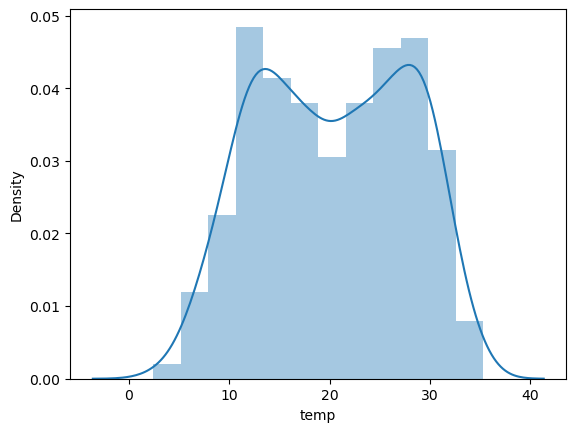

In [367]:
# temperature
sns.distplot(day['temp'])
plt.show()

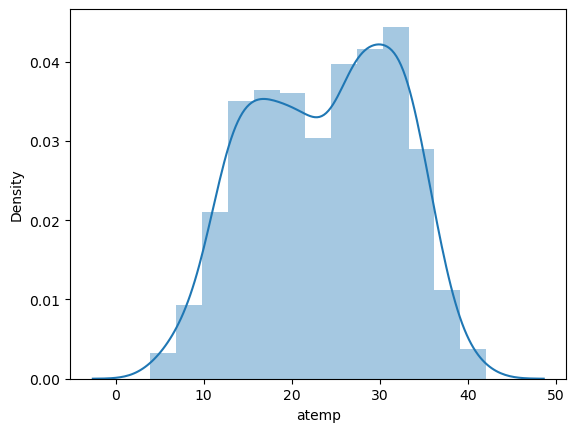

In [368]:
# feeling temperature
sns.distplot(day['atemp'])
plt.show()

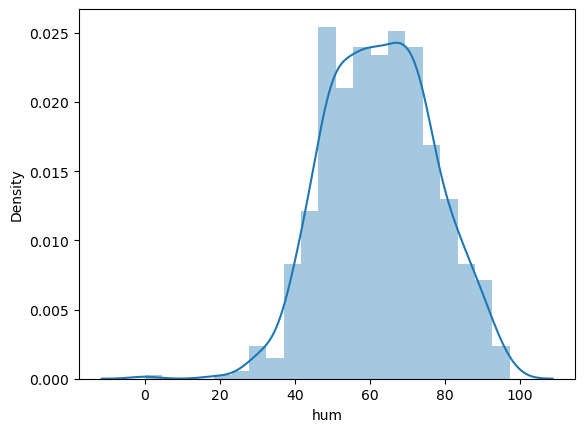

In [369]:
# humidity
sns.distplot(day['hum'])
plt.show()

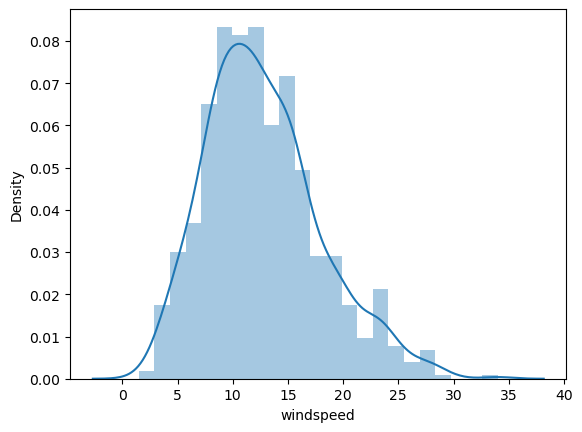

In [370]:
# wind speed
sns.distplot(day['windspeed'])
plt.show()

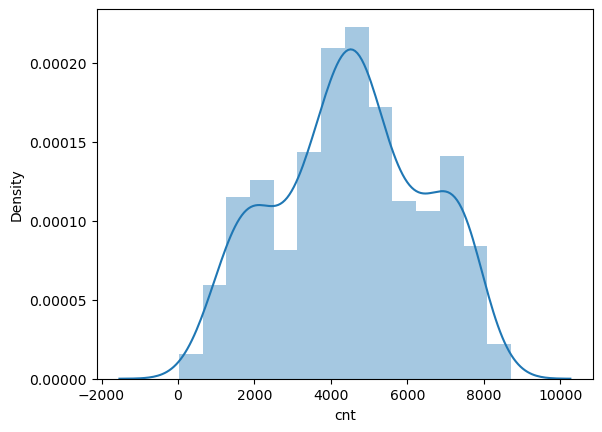

In [371]:
# Target variable: count of total rental bikes
sns.distplot(day['cnt'])
plt.show()

#### Visualising Categorical Variables

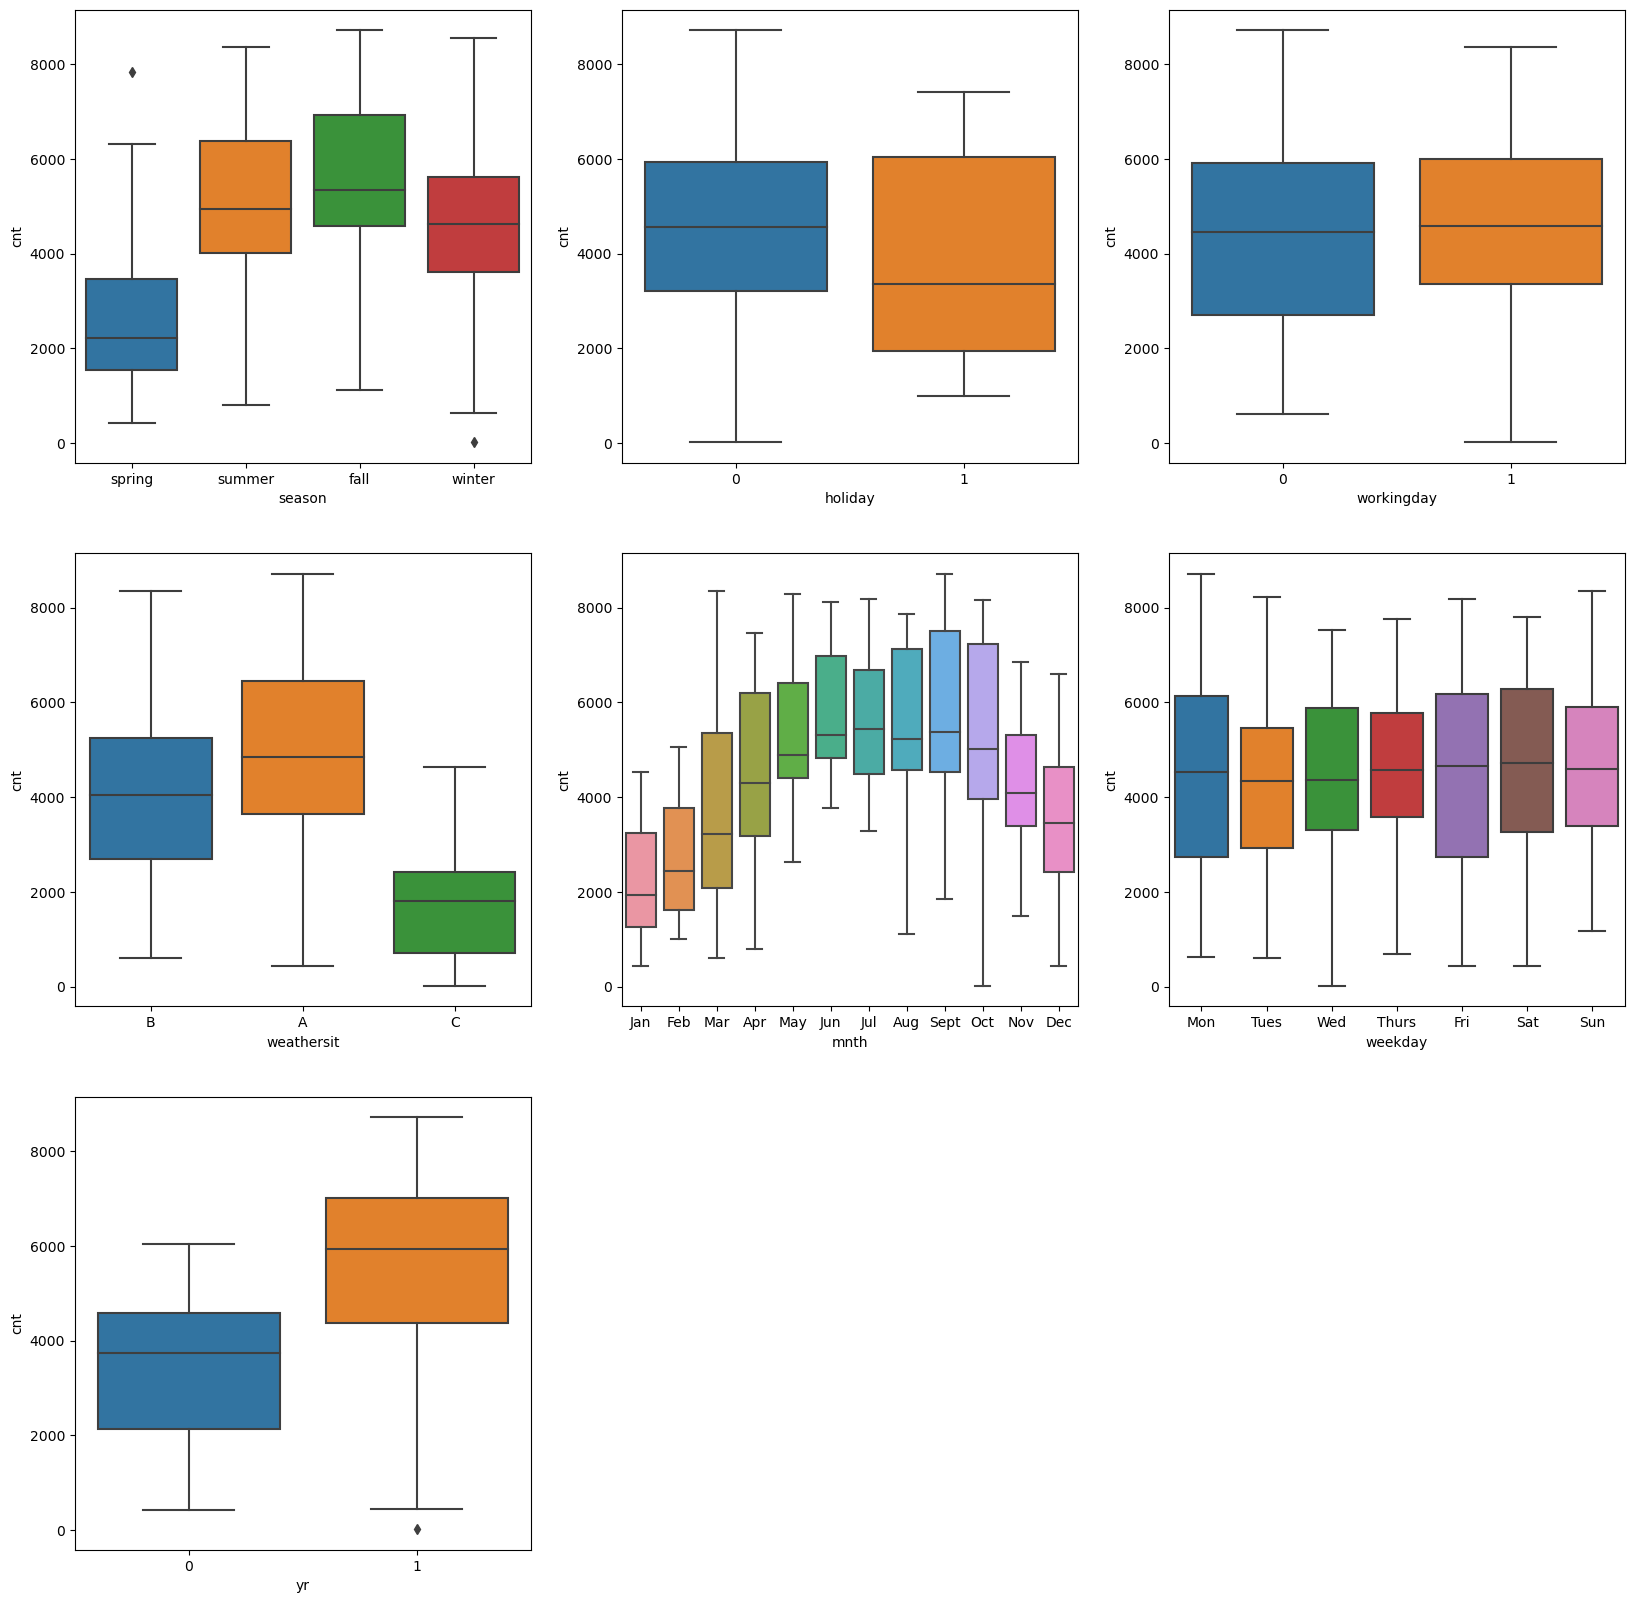

In [372]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.show()

#### Visualising Numeric Variables

In [373]:
#All numeric variables in the dataset
day_numeric_colmns = day.select_dtypes(include=['float64', 'int64'])
day_numeric_colmns.head()

instant  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0        1   0        0           0  14.110847  18.18125  80.5833  10.749882   
1        2   0        0           0  14.902598  17.68695  69.6087  16.652113   
2        3   0        0           1   8.050924   9.47025  43.7273  16.636703   
3        4   0        0           1   8.200000  10.60610  59.0435  10.739832   
4        5   0        0           1   9.305237  11.46350  43.6957  12.522300   

   casual  registered   cnt  
0     331         654   985  
1     131         670   801  
2     120        1229  1349  
3     108        1454  1562  
4      82        1518  1600

In [374]:
day_numeric_colmns.drop('instant', axis=1, inplace = True)

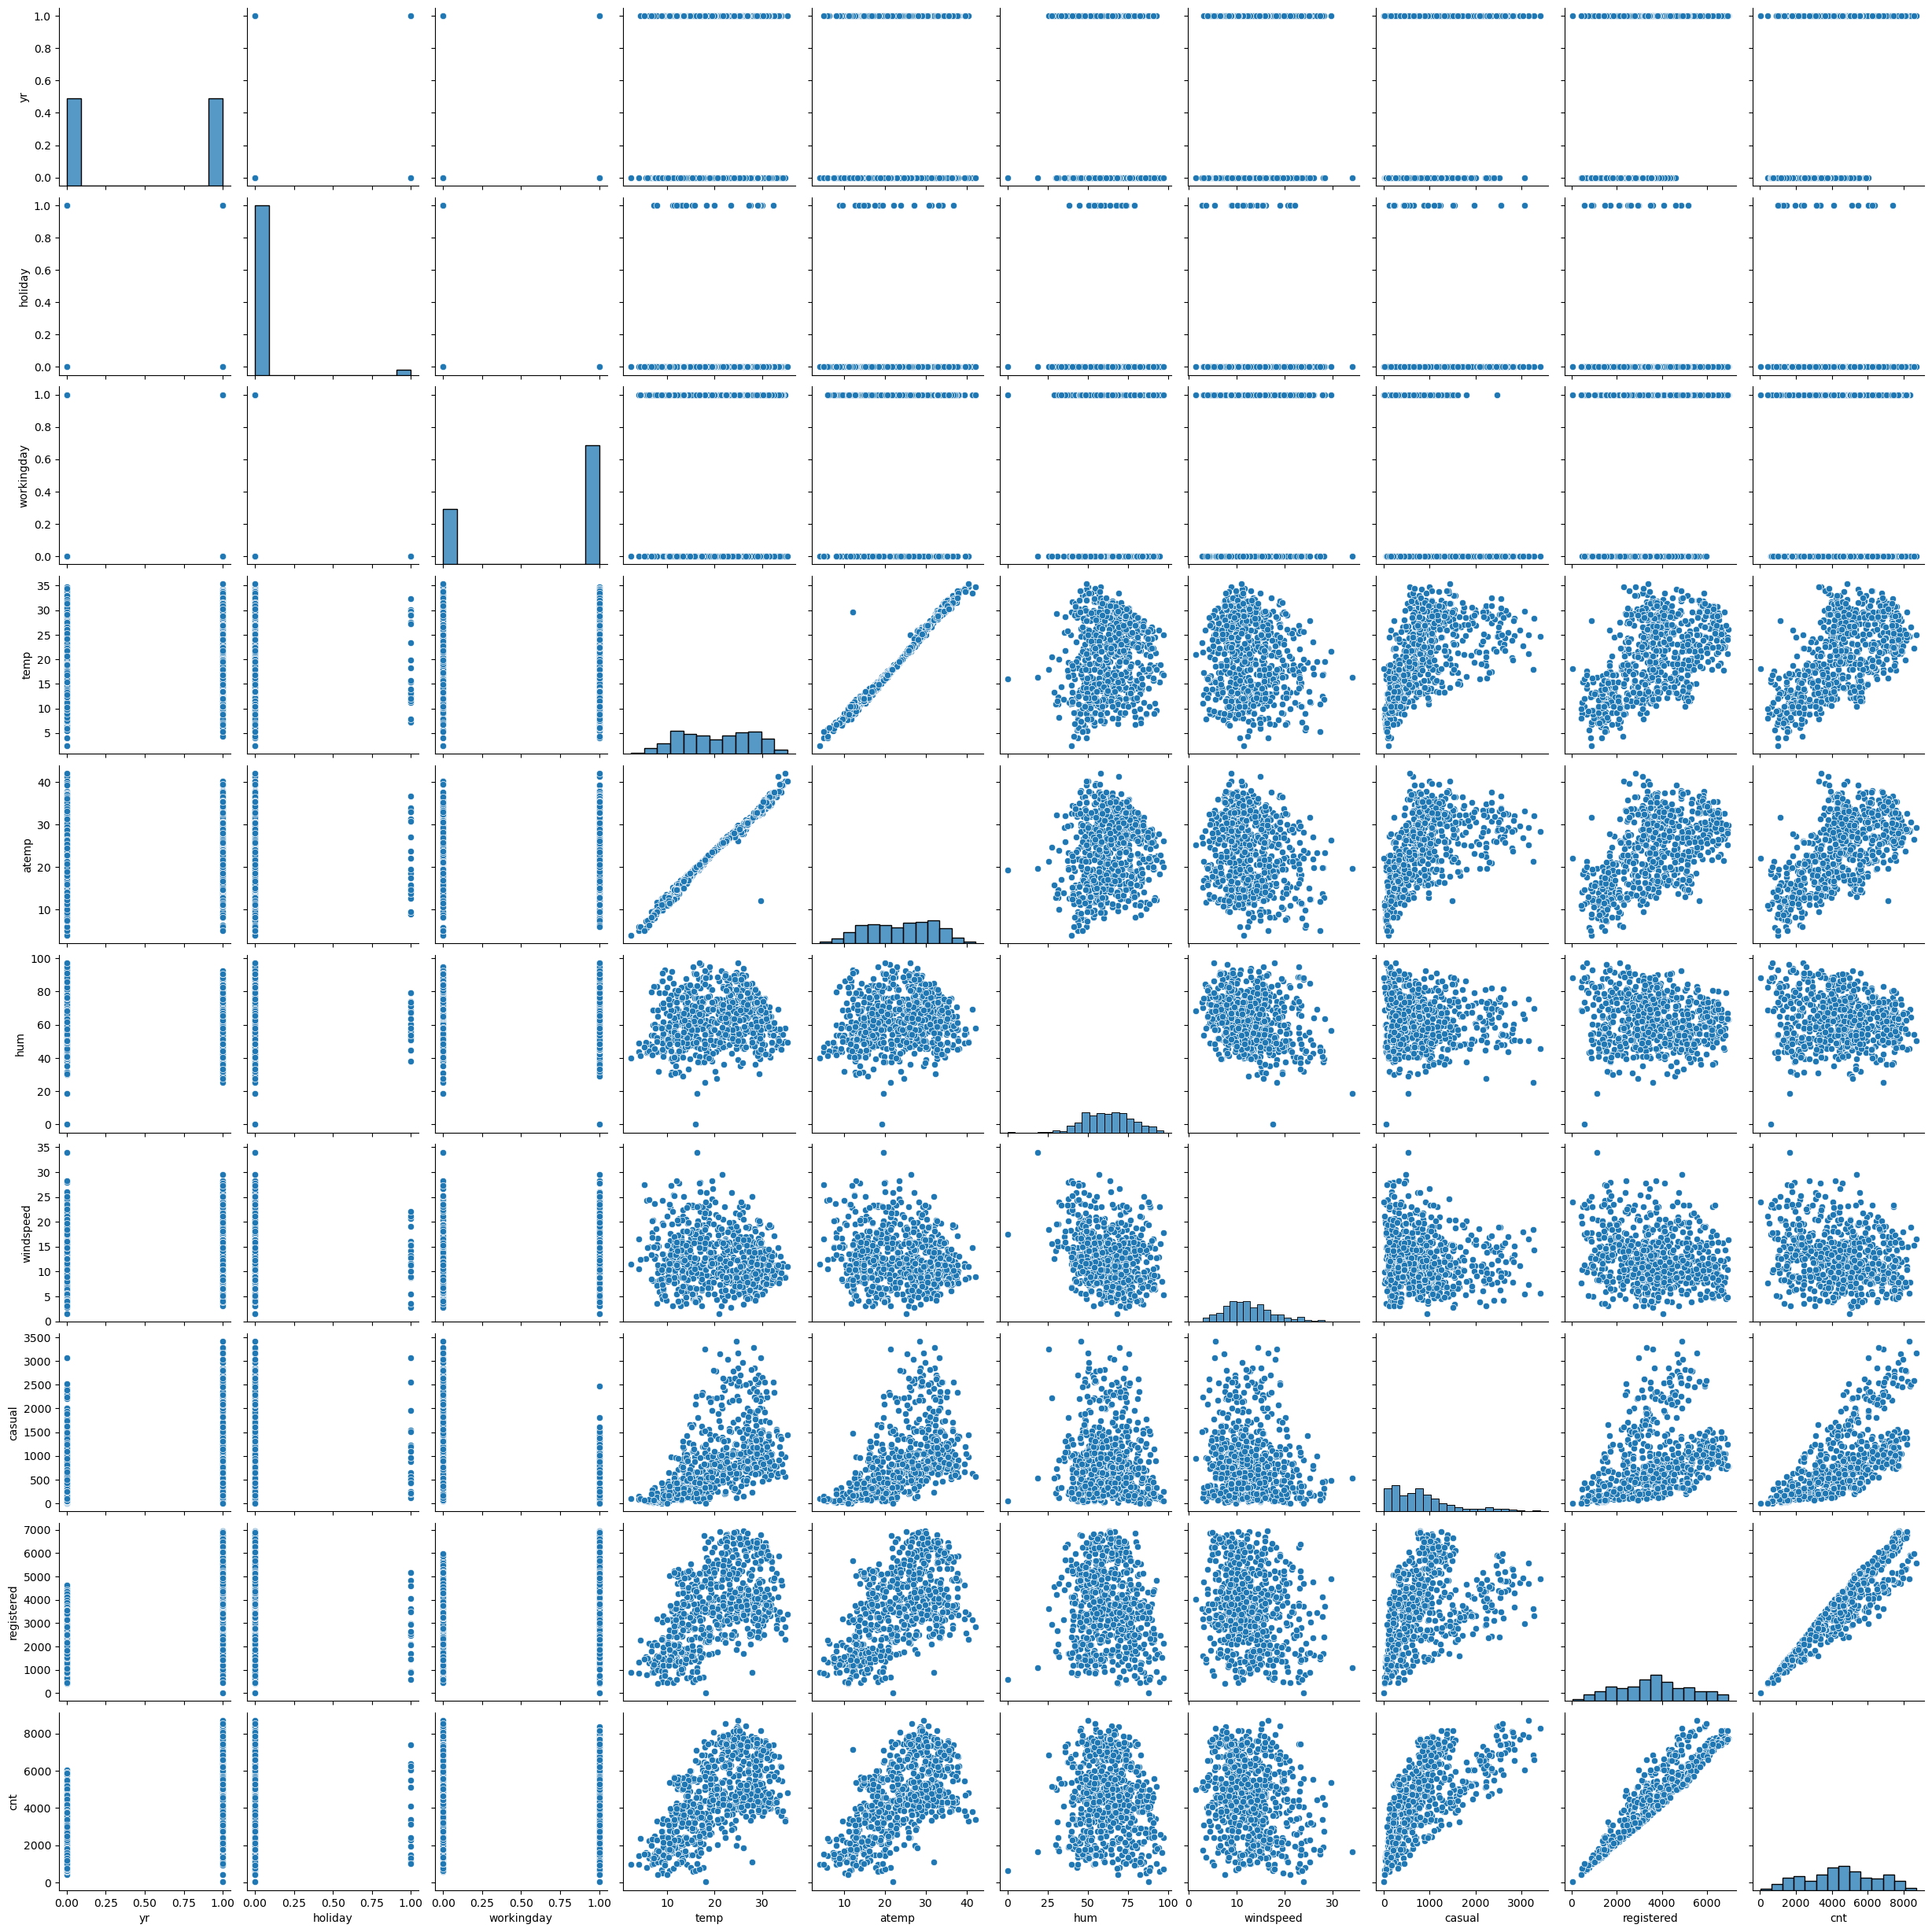

In [375]:
# Pairwise scatter plot
sns.pairplot(day_numeric_colmns)
plt.show()

In [376]:
# Since year, holiday & workingday doenst seems to have any strong correlation amongst them hence dropping these columns
day_numeric_colmns.drop('yr', axis=1, inplace = True)
day_numeric_colmns.drop('holiday', axis=1, inplace = True)
day_numeric_colmns.drop('workingday', axis=1, inplace = True)

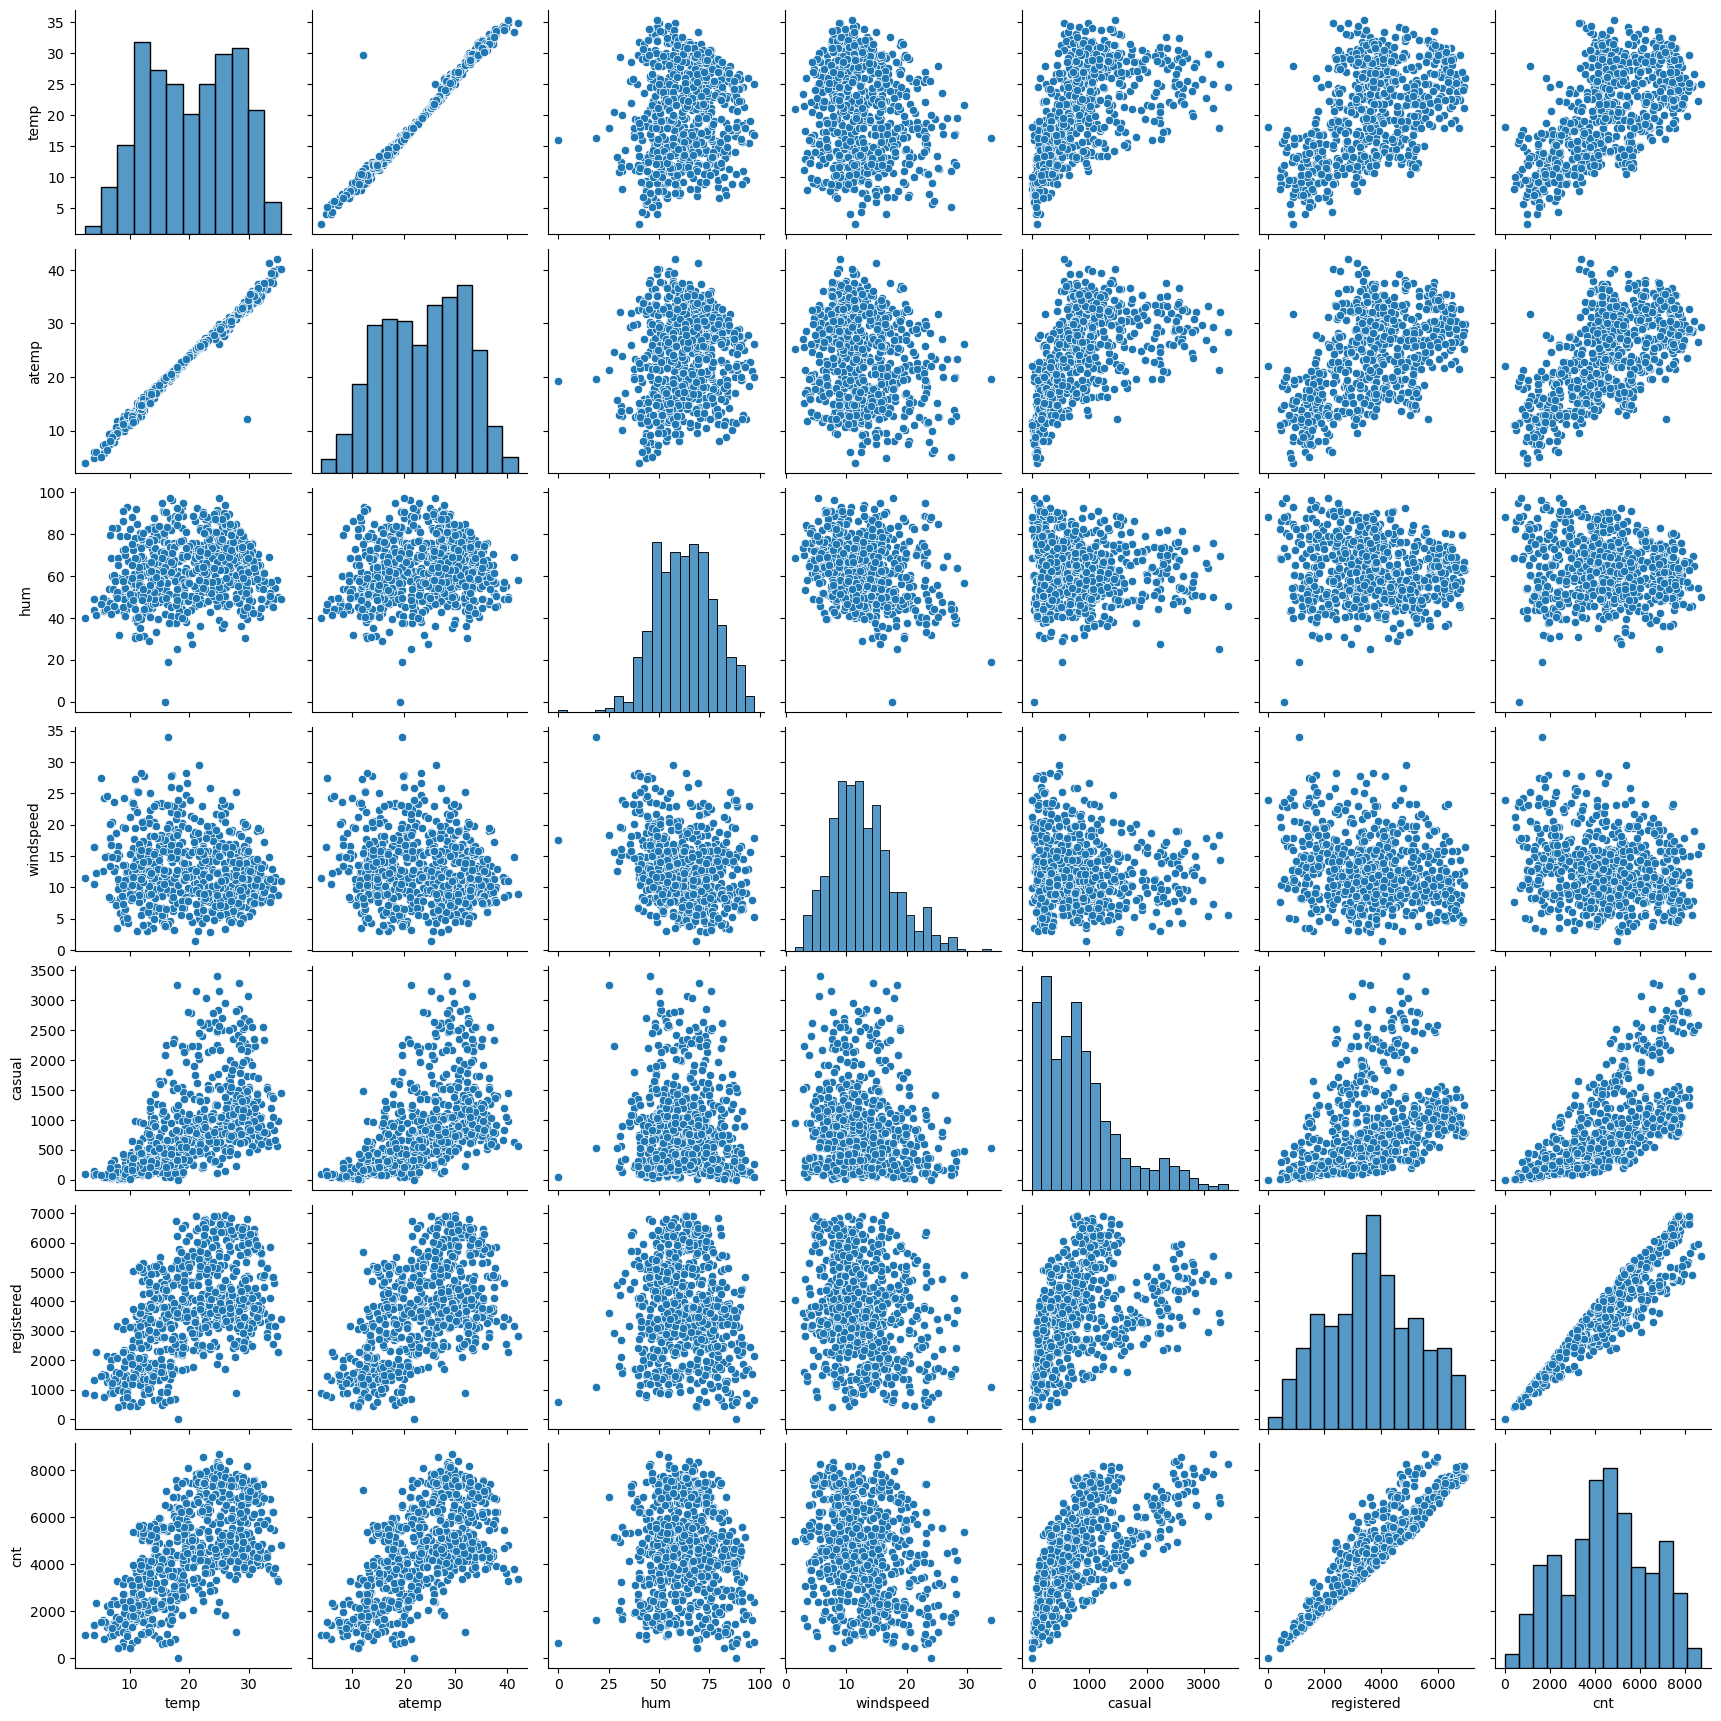

In [377]:
# Pairwise scatter plot
sns.pairplot(day_numeric_colmns)
plt.show()

In [378]:
# Correlation matrix
cor = day_numeric_colmns.corr()
cor

temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
hum         0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
cnt         0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

                 cnt  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
cnt         1.000000

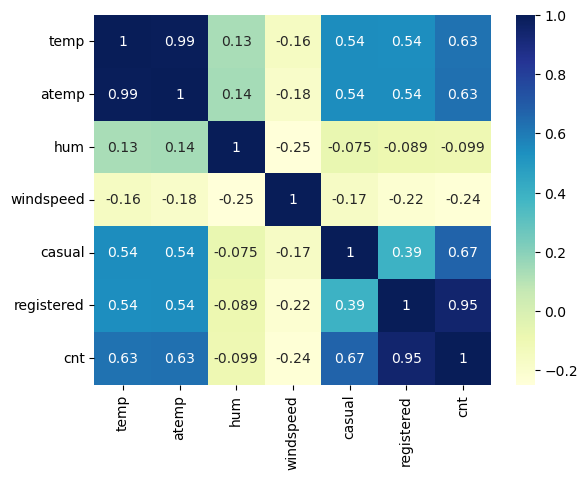

In [379]:
sns.heatmap(day_numeric_colmns.corr(), cmap="YlGnBu", annot = True)
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered', temparature and atemp
- Count is negatively correlated to 'windspeed' (-0.24 approximately). This means that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- temp & atemps are highly correlated. The correlation between the two is almost equal to 1. so we can drop atemp column to remove multicollinearity


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [380]:
#removing atemp as it is highly correlated with temp
day_numeric_colmns.drop('atemp',axis=1,inplace=True) 

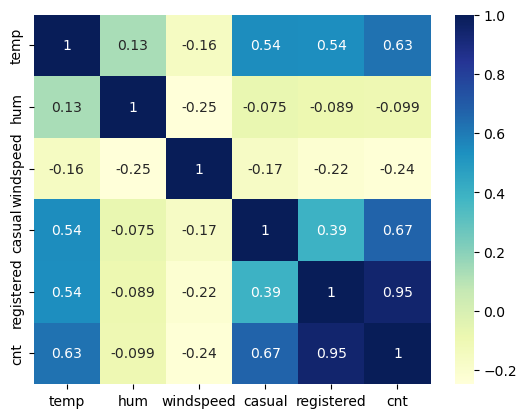

In [381]:
sns.heatmap(day_numeric_colmns.corr(), cmap="YlGnBu", annot = True)
plt.show()

## 3. Data Preparation 


#### Data Preparation to build the model.
'yr', 'mnth', 'holiday', 'weekday' and 'workingday' are object variables and few of them have binary values: 0s and 1s in them which have specific meanings associated with them.

In [382]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [383]:
# Subset all categorical variables
day_categorical_colmns=day.select_dtypes(include=['object'])

In [384]:
day_categorical_colmns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      730 non-null    object
 1   season      730 non-null    object
 2   mnth        730 non-null    object
 3   weekday     730 non-null    object
 4   weathersit  730 non-null    object
dtypes: object(5)
memory usage: 28.6+ KB


In [385]:
day_categorical_colmns.head()

dteday  season mnth weekday weathersit
0  01-01-2018  spring  Jan     Mon          B
1  02-01-2018  spring  Jan    Tues          B
2  03-01-2018  spring  Jan     Wed          A
3  04-01-2018  spring  Jan   Thurs          A
4  05-01-2018  spring  Jan     Fri          A

In [386]:
day_categorical_colmns.drop('dteday', axis=1, inplace = True)

#### Dummy Variables 
We will use `dummy variables` to convert different levels of categorical columns to integer values

In [387]:
# Convert into dummies
day_dummies = pd.get_dummies(day_categorical_colmns, drop_first=True)
day_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0           True          False          False     False     False     False   
1           True          False          False     False     False     False   
2           True          False          False     False     False     False   
3           True          False          False     False     False     False   
4           True          False          False     False     False     False   

   mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  \
0      True     False     False     False     False     False     False   
1      True     False     False     False     False     False     False   
2      True     False     False     False     False     False     False   
3      True     False     False     False     False     False     False   
4      True     False     False     False     False     False     False   

   mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  \
0      False         True        False        False          False   
1      False        False        False        False          False   
2      False        False        False        False          False   
3      False        False        False        False           True   
4      False        False        False        False          False   

   weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
0         False        False          True         False  
1          True        False          True         False  
2         False         True         False         False  
3         False        False         False         False  
4         False        False         False         False

In [388]:
day_dummies = day_dummies.astype('int64')

In [389]:
day_dummies

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
0                1              0              0         0         0   
1                1              0              0         0         0   
2                1              0              0         0         0   
3                1              0              0         0         0   
4                1              0              0         0         0   
..             ...            ...            ...       ...       ...   
725              1              0              0         0         1   
726              1              0              0         0         1   
727              1              0              0         0         1   
728              1              0              0         0         1   
729              1              0              0         0         1   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
0           0         1         0         0         0         0         0   
1           0         1         0         0         0         0         0   
2           0         1         0         0         0         0         0   
3           0         1         0         0         0         0         0   
4           0         1         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         0         0         0         0         0         0         0   
726         0         0         0         0         0         0         0   
727         0         0         0         0         0         0         0   
728         0         0         0         0         0         0         0   
729         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  \
0           0          0            1            0            0   
1           0          0            0            0            0   
2           0          0            0            0            0   
3           0          0            0            0            0   
4           0          0            0            0            0   
..        ...        ...          ...          ...          ...   
725         0          0            0            1            0   
726         0          0            0            0            1   
727         0          0            1            0            0   
728         0          0            0            0            0   
729         0          0            0            0            0   

     weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
0                0             0            0             1             0  
1                0             1            0             1             0  
2                0             0            1             0             0  
3                1             0            0             0             0  
4                0             0            0             0             0  
..             ...           ...          ...           ...           ...  
725              0             0            0             1             0  
726              0             0            0             1             0  
727              0             0            0             1             0  
728              0             1            0             0             0  
729              0             0            1             1             0  

[730 rows x 22 columns]

In [390]:
# Drop categorical variable columns
day = day.drop(list(day_categorical_colmns.columns), axis=1)

In [391]:
day

instant      dteday  yr  holiday  workingday       temp     atemp  \
0          1  01-01-2018   0        0           0  14.110847  18.18125   
1          2  02-01-2018   0        0           0  14.902598  17.68695   
2          3  03-01-2018   0        0           1   8.050924   9.47025   
3          4  04-01-2018   0        0           1   8.200000  10.60610   
4          5  05-01-2018   0        0           1   9.305237  11.46350   
..       ...         ...  ..      ...         ...        ...       ...   
725      726  27-12-2019   1        0           1  10.420847  11.33210   
726      727  28-12-2019   1        0           1  10.386653  12.75230   
727      728  29-12-2019   1        0           0  10.386653  12.12000   
728      729  30-12-2019   1        0           0  10.489153  11.58500   
729      730  31-12-2019   1        0           1   8.849153  11.17435   

         hum  windspeed  casual  registered   cnt  
0    80.5833  10.749882     331         654   985  
1    69.6087  16.652113     131         670   801  
2    43.7273  16.636703     120        1229  1349  
3    59.0435  10.739832     108        1454  1562  
4    43.6957  12.522300      82        1518  1600  
..       ...        ...     ...         ...   ...  
725  65.2917  23.458911     247        1867  2114  
726  59.0000  10.416557     644        2451  3095  
727  75.2917   8.333661     159        1182  1341  
728  48.3333  23.500518     364        1432  1796  
729  57.7500  10.374682     439        2290  2729  

[730 rows x 12 columns]

In [392]:
# Concatenate dummy variables with the original dataframe
day = pd.concat([day, day_dummies], axis=1)

In [393]:
day

instant      dteday  yr  holiday  workingday       temp     atemp  \
0          1  01-01-2018   0        0           0  14.110847  18.18125   
1          2  02-01-2018   0        0           0  14.902598  17.68695   
2          3  03-01-2018   0        0           1   8.050924   9.47025   
3          4  04-01-2018   0        0           1   8.200000  10.60610   
4          5  05-01-2018   0        0           1   9.305237  11.46350   
..       ...         ...  ..      ...         ...        ...       ...   
725      726  27-12-2019   1        0           1  10.420847  11.33210   
726      727  28-12-2019   1        0           1  10.386653  12.75230   
727      728  29-12-2019   1        0           0  10.386653  12.12000   
728      729  30-12-2019   1        0           0  10.489153  11.58500   
729      730  31-12-2019   1        0           1   8.849153  11.17435   

         hum  windspeed  casual  registered   cnt  season_spring  \
0    80.5833  10.749882     331         654   985              1   
1    69.6087  16.652113     131         670   801              1   
2    43.7273  16.636703     120        1229  1349              1   
3    59.0435  10.739832     108        1454  1562              1   
4    43.6957  12.522300      82        1518  1600              1   
..       ...        ...     ...         ...   ...            ...   
725  65.2917  23.458911     247        1867  2114              1   
726  59.0000  10.416557     644        2451  3095              1   
727  75.2917   8.333661     159        1182  1341              1   
728  48.3333  23.500518     364        1432  1796              1   
729  57.7500  10.374682     439        2290  2729              1   

     season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
0                0              0         0         0         0         1   
1                0              0         0         0         0         1   
2                0              0         0         0         0         1   
3                0              0         0         0         0         1   
4                0              0         0         0         0         1   
..             ...            ...       ...       ...       ...       ...   
725              0              0         0         1         0         0   
726              0              0         0         1         0         0   
727              0              0         0         1         0         0   
728              0              0         0         1         0         0   
729              0              0         0         1         0         0   

     mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sept  \
0           0         0         0         0         0         0          0   
1           0         0         0         0         0         0          0   
2           0         0         0         0         0         0          0   
3           0         0         0         0         0         0          0   
4           0         0         0         0         0         0          0   
..        ...       ...       ...       ...       ...       ...        ...   
725         0         0         0         0         0         0          0   
726         0         0         0         0         0         0          0   
727         0         0         0         0         0         0          0   
728         0         0         0         0         0         0          0   
729         0         0         0         0         0         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
0              1            0            0              0             0   
1              0            0            0              0             1   
2              0            0            0              0             0   
3              0            0            0              1             0   
4              0            0            0              0     

In [394]:
day.drop ('atemp', axis=1, inplace =True) #Droping atemp columns as temp & atemp are having high correlation

In [395]:
day

instant      dteday  yr  holiday  workingday       temp      hum  \
0          1  01-01-2018   0        0           0  14.110847  80.5833   
1          2  02-01-2018   0        0           0  14.902598  69.6087   
2          3  03-01-2018   0        0           1   8.050924  43.7273   
3          4  04-01-2018   0        0           1   8.200000  59.0435   
4          5  05-01-2018   0        0           1   9.305237  43.6957   
..       ...         ...  ..      ...         ...        ...      ...   
725      726  27-12-2019   1        0           1  10.420847  65.2917   
726      727  28-12-2019   1        0           1  10.386653  59.0000   
727      728  29-12-2019   1        0           0  10.386653  75.2917   
728      729  30-12-2019   1        0           0  10.489153  48.3333   
729      730  31-12-2019   1        0           1   8.849153  57.7500   

     windspeed  casual  registered   cnt  season_spring  season_summer  \
0    10.749882     331         654   985              1              0   
1    16.652113     131         670   801              1              0   
2    16.636703     120        1229  1349              1              0   
3    10.739832     108        1454  1562              1              0   
4    12.522300      82        1518  1600              1              0   
..         ...     ...         ...   ...            ...            ...   
725  23.458911     247        1867  2114              1              0   
726  10.416557     644        2451  3095              1              0   
727   8.333661     159        1182  1341              1              0   
728  23.500518     364        1432  1796              1              0   
729  10.374682     439        2290  2729              1              0   

     season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  \
0                0         0         0         0         1         0   
1                0         0         0         0         1         0   
2                0         0         0         0         1         0   
3                0         0         0         0         1         0   
4                0         0         0         0         1         0   
..             ...       ...       ...       ...       ...       ...   
725              0         0         1         0         0         0   
726              0         0         1         0         0         0   
727              0         0         1         0         0         0   
728              0         0         1         0         0         0   
729              0         0         1         0         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sept  weekday_Mon  \
0           0         0         0         0         0          0            1   
1           0         0         0         0         0          0            0   
2           0         0         0         0         0          0            0   
3           0         0         0         0         0          0            0   
4           0         0         0         0         0          0            0   
..        ...       ...       ...       ...       ...        ...          ...   
725         0         0         0         0         0          0            0   
726         0         0         0         0         0          0            0   
727         0         0         0         0         0          0            1   
728         0         0         0         0         0          0            0   
729         0         0         0         0         0          0            0   

     weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  weekday_Wed  \
0              0            0              0             0            0   
1              0            0              0             1            0   
2              0            0              0             0            1   
3              0            0              1             0            0   
4              0          

In [396]:
day.drop (['instant','dteday'], axis=1, inplace =True) #Droping instant & dteday columns as they are of no use

In [397]:
day

yr  holiday  workingday       temp      hum  windspeed  casual  \
0     0        0           0  14.110847  80.5833  10.749882     331   
1     0        0           0  14.902598  69.6087  16.652113     131   
2     0        0           1   8.050924  43.7273  16.636703     120   
3     0        0           1   8.200000  59.0435  10.739832     108   
4     0        0           1   9.305237  43.6957  12.522300      82   
..   ..      ...         ...        ...      ...        ...     ...   
725   1        0           1  10.420847  65.2917  23.458911     247   
726   1        0           1  10.386653  59.0000  10.416557     644   
727   1        0           0  10.386653  75.2917   8.333661     159   
728   1        0           0  10.489153  48.3333  23.500518     364   
729   1        0           1   8.849153  57.7500  10.374682     439   

     registered   cnt  season_spring  season_summer  season_winter  mnth_Aug  \
0           654   985              1              0              0         0   
1           670   801              1              0              0         0   
2          1229  1349              1              0              0         0   
3          1454  1562              1              0              0         0   
4          1518  1600              1              0              0         0   
..          ...   ...            ...            ...            ...       ...   
725        1867  2114              1              0              0         0   
726        2451  3095              1              0              0         0   
727        1182  1341              1              0              0         0   
728        1432  1796              1              0              0         0   
729        2290  2729              1              0              0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
0           0         0         1         0         0         0         0   
1           0         0         1         0         0         0         0   
2           0         0         1         0         0         0         0   
3           0         0         1         0         0         0         0   
4           0         0         1         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
725         1         0         0         0         0         0         0   
726         1         0         0         0         0         0         0   
727         1         0         0         0         0         0         0   
728         1         0         0         0         0         0         0   
729         1         0         0         0         0         0         0   

     mnth_Nov  mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  \
0           0         0          0            1            0            0   
1           0         0          0            0            0            0   
2           0         0          0            0            0            0   
3           0         0          0            0            0            0   
4           0         0          0            0            0            0   
..        ...       ...        ...          ...          ...          ...   
725         0         0          0            0            1            0   
726         0         0          0            0            0            1   
727         0         0          0            1            0            0   
728         0         0          0            0            0            0   
729         0         0          0            0            0            0   

     weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
0                0             0            0             1             0  
1                0             1            0             1             0  
2                0             0            1             0             0  
3                1             0     

## 4. Model Building and Evaluation

Let's start building the model. 
Steps involved in model building are 
1. Splitting the Data into Training and Testing Sets
2. Create X & Y 
3. Train (Fit) the model on Train Dataset 
4. Evaluate the Model

#### 1. Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

We are usning 70/30 % ratio for Train & Test Dataset

In [485]:
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
print (df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


#### Rescaling the Features
Let's scale all numeric columns using MinMaxScaler. 

In [486]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [487]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [488]:
df_train

yr  holiday  workingday      temp       hum  windspeed    casual  \
653   1        0           1  0.509887  0.575354   0.300794  0.280402   
576   1        0           1  0.815169  0.725633   0.264686  0.294422   
426   1        0           0  0.442393  0.640189   0.255342  0.290765   
728   1        0           0  0.245101  0.498067   0.663106  0.110332   
482   1        0           0  0.395666  0.504508   0.188475  0.340750   
..   ..      ...         ...       ...       ...        ...       ...   
526   1        0           1  0.824514  0.605840   0.355596  0.309357   
578   1        0           1  0.863973  0.679690   0.187140  0.298994   
53    0        0           1  0.202618  0.435939   0.111379  0.041756   
350   0        0           0  0.248216  0.577930   0.431816  0.083206   
79    0        0           1  0.462664  0.759870   0.529881  0.121609   

     registered       cnt  season_spring  season_summer  season_winter  \
653    0.951776  0.864243              0              0              1   
576    0.899220  0.827658              0              0              0   
426    0.446145  0.465255              1              0              0   
728    0.203869  0.204096              1              0              0   
482    0.444701  0.482973              0              1              0   
..          ...       ...            ...            ...            ...   
526    0.812446  0.764151              0              1              0   
578    0.903552  0.832835              0              0              0   
53     0.253826  0.218017              1              0              0   
350    0.352873  0.312586              0              0              1   
79     0.239099  0.236424              0              1              0   

     mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  \
653         0         0         0         0         0         0         0   
576         0         0         0         0         1         0         0   
426         0         0         0         0         0         0         1   
728         0         1         0         0         0         0         0   
482         0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
526         0         0         0         0         0         1         0   
578         1         0         0         0         0         0         0   
53          0         0         1         0         0         0         0   
350         0         1         0         0         0         0         0   
79          0         0         0         0         0         0         1   

     mnth_May  mnth_Nov  mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  \
653         0         0         1          0            0            0   
576         0         0         0          0            0            0   
426         0         0         0          0            1            0   
728         0         0         0          0            0            0   
482         0         0         0          0            1            0   
..        ...       ...       ...        ...          ...          ...   
526         0         0         0          0            0            0   
578         0         0         0          0            0            1   
53          0         0         0          0            0            0   
350         0         0         0          0            1            0   
79          0         0         0          0            0            0   

     weekday_Sun  weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  \
653            0              1             0            0             0   
576            0              1             0            0             0   
426            0              0             0            0             1   
728            0              0             1            0             0   
482            0              0             0

In [489]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           casual  registered         cnt  season_spring  season_summer  \
count  510.000000  510.000000  510.000000     510.000000     510.000000   
mean     0.254661    0.523944    0.513620       0.243137       0.245098   
std      0.206011    0.228175    0.224593       0.429398       0.430568   
min      0.000000    0.000000    0.000000       0.000000       0.000000   
25%      0.094179    0.353487    0.356420       0.000000       0.000000   
50%      0.212740    0.525123    0.518638       0.000000       0.000000   
75%      0.327415    0.696073    0.684710       0.000000       0.000000   
max      1.000000    1.000000    1.000000       1.000000       1.000000   

       season_winter    mnth_Aug    mnth_Dec    mnth_Feb    mnth_Jan  \
count      510.00000  510.000000  510.000000  510.000000  510.000000   
mean         0.24902    0.096078    0.084314    0.066667    0.088235   
std          0.43287    0.294988    0.278131    0.249689    0.283915   
min          0.00000    0.000000    0.000000    0.000000    0.000000   
25%          0.00000    0.000000    0.000000    0.000000    0.000000   
50%          0.00000    0.000000    0.000000    0.000000    0.000000   
75%          0.00000    0.000000    0.000000    0.000000    0.000000   
max          1.00000    1.000000    1.000000    1.000000    1.000000   

         mnth_Jul    mnth_Jun    mnth_Mar    mnth_May    mnth_Nov    mnth_Oct  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.074510    0.098039    0.084314    0.086275    0.086275   
std      0.266010    0.262857    0.297660    0.278131    0.281045    0.281045   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  \
count  510.000000   510.000000   510.000000   510.000000     510.000000   
mean     0.080392     0.154902     0.133333     0.127451       0.131373   
std      0.272166     0.362166     0.340268     0.333805       0.338139   
min      0.000000     0.000000     0.000000     0.000000       0.000000   
25%      0.000000     0.000000     0.000000     0.000000       0.000000   
50%      0.000000     0.000000     0.000000     0.000000       0.000000   
75%      0.000000     0.000000     0.000000     0.000000       0.000000   
max      1.000000     1.000000     1.000000     1.000000       1.000000   

       weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
count    510.000000   510.000000    510.000000    510.000000  
mean       0.143137     0.150980      0.343137      0.029412  
std        0.350557     0.358381      0.475223      0.169124  
min        0.000000     0.000000      0.000000      0.000000  
25%        0.000000     0.000000      0.000000      0.000000  
50%        0.000000     0.000000      0.000000      0.000000  
75%        0.000000     0.000000      1.000000      0.000000  
max        1.000000     1.000000      1.000000    

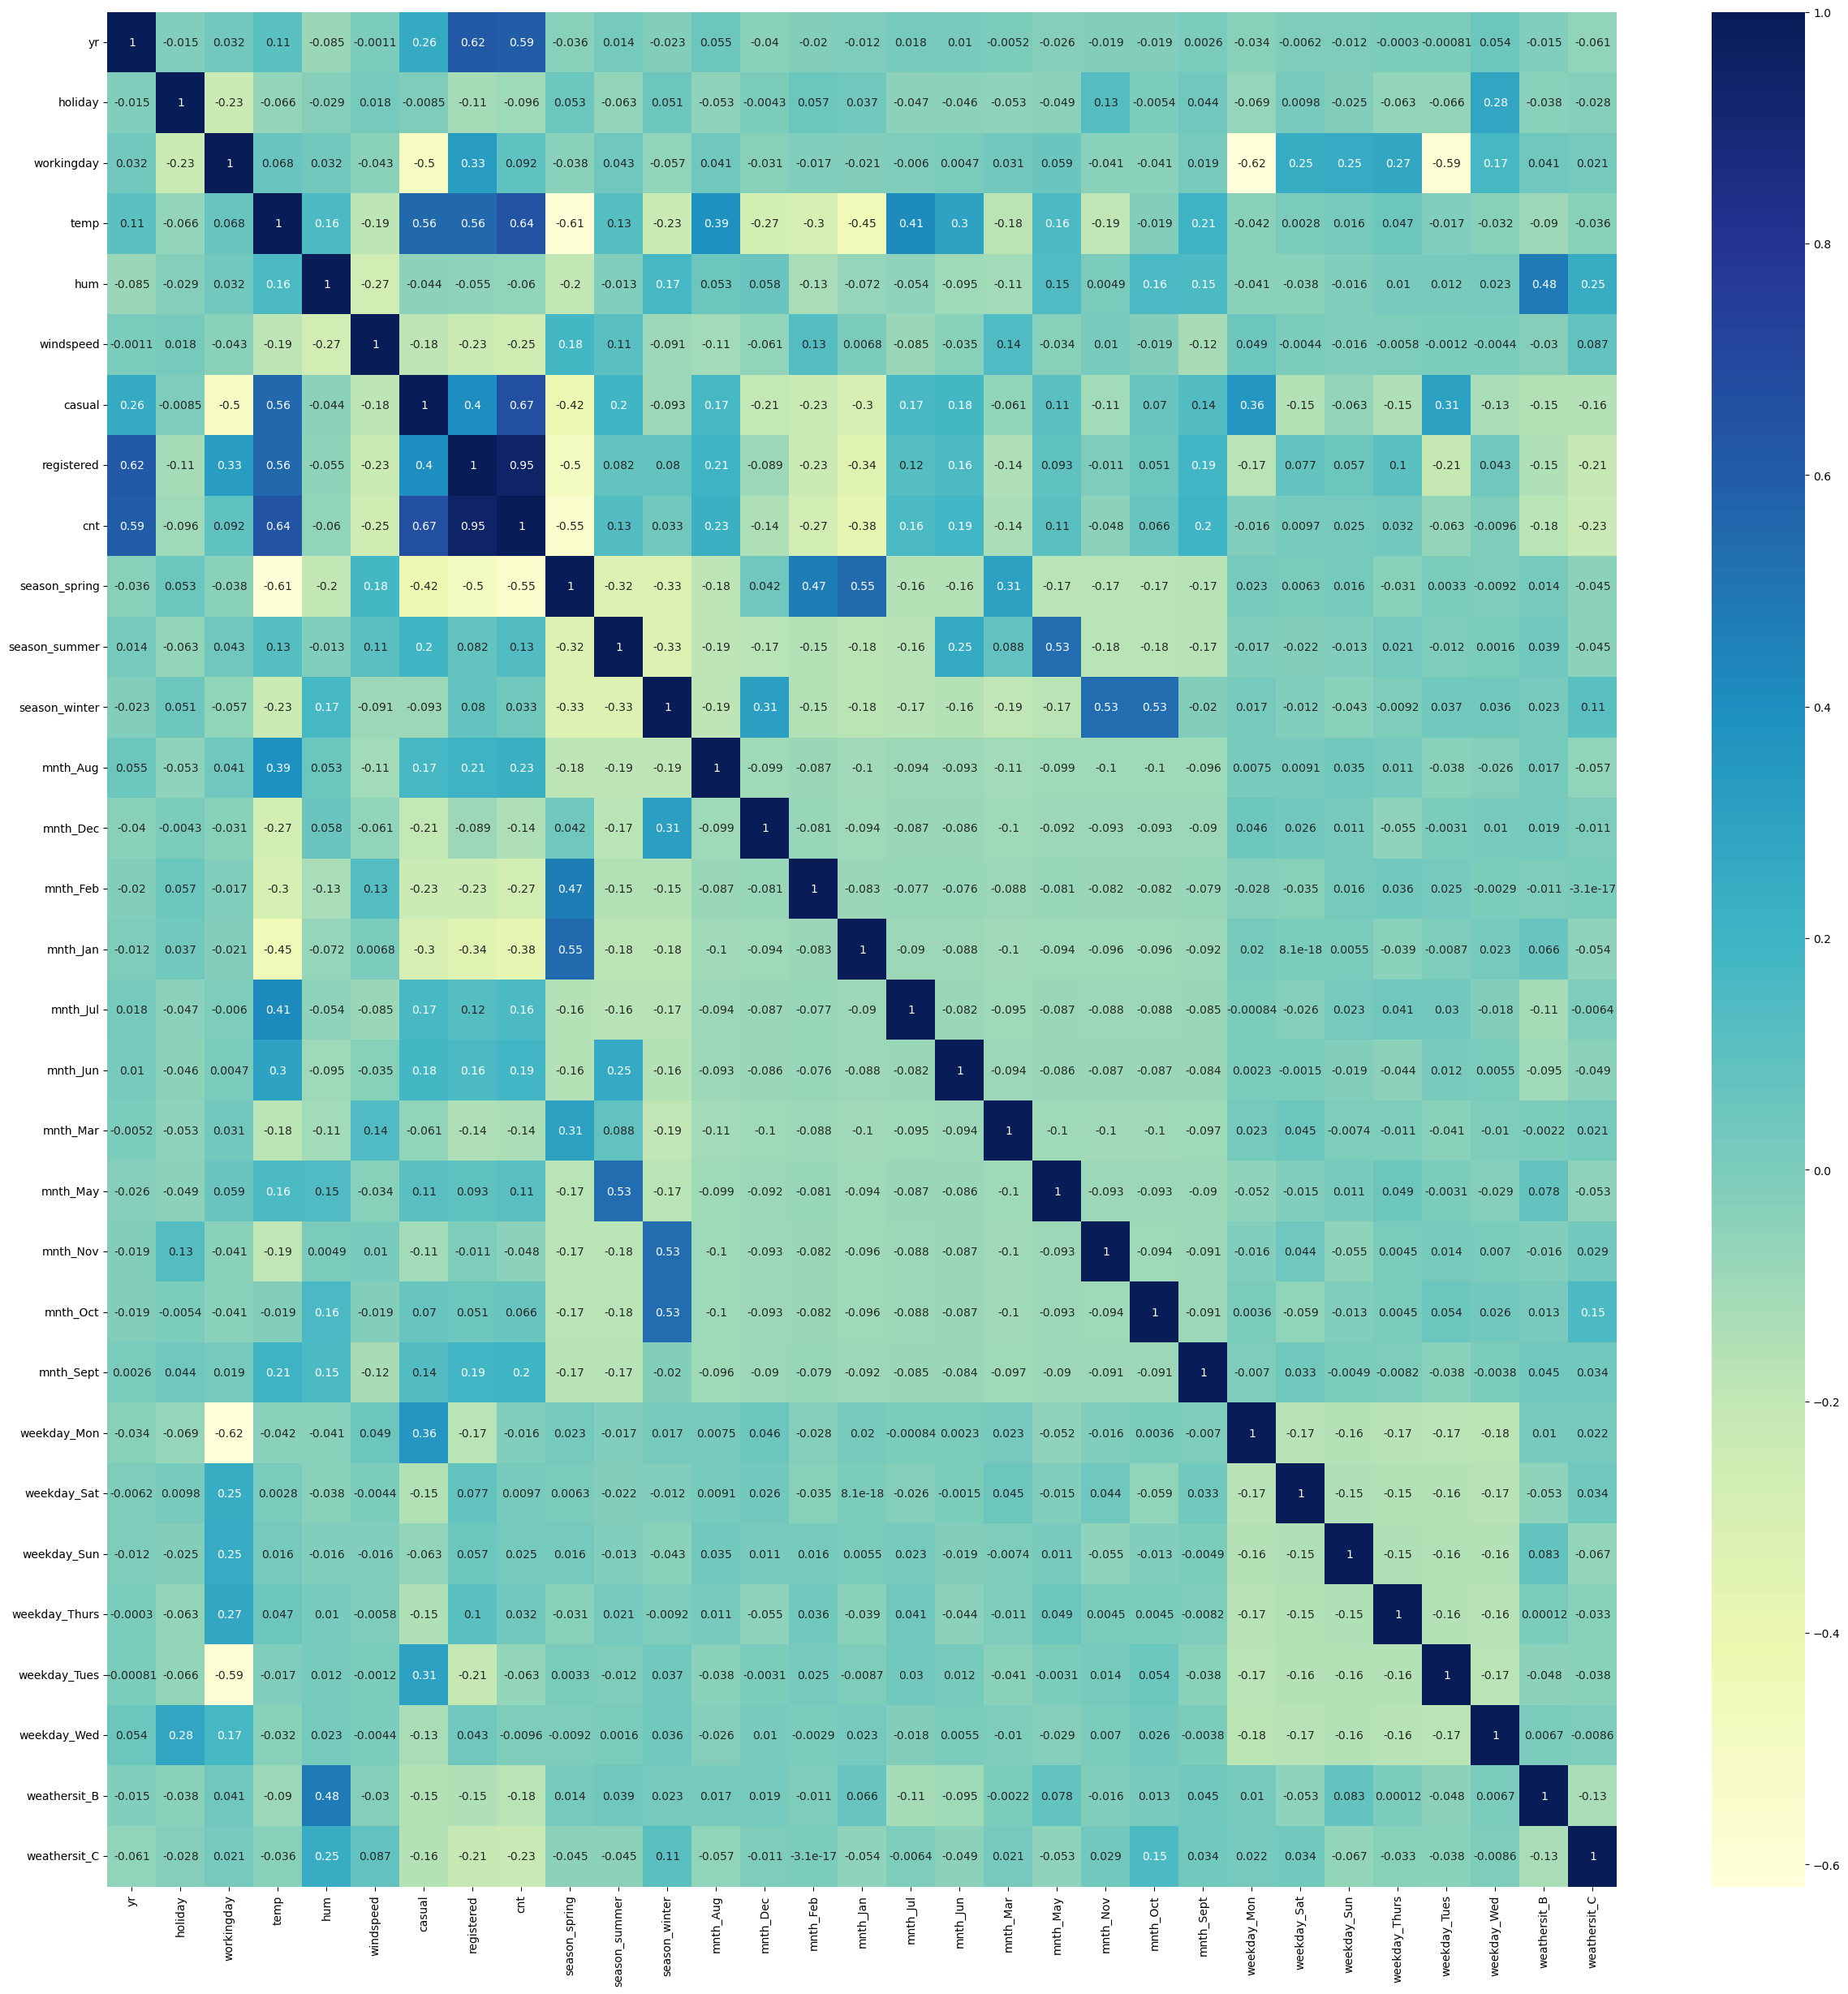

In [490]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above heatmap we can see `temp` is highly correlated to cnt. Lets plot scaterrred grapgh of `temp` vs `cnt`

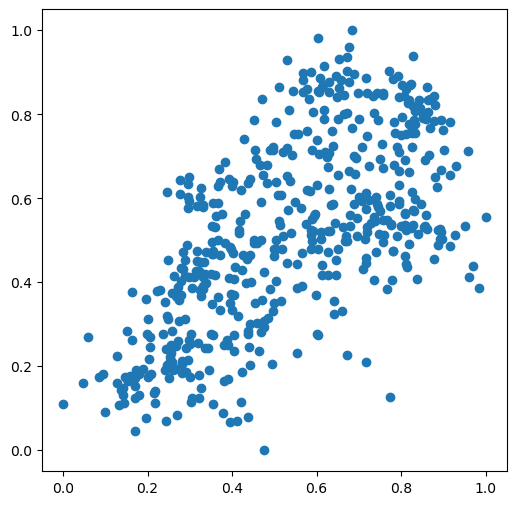

In [491]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### 2. Create X & Y

Lets Create Y Axis = `cnt` & Rest of the columns as X Axis

In [492]:
# Dropping 'casual' and 'registered' as cnt is sum of these 2 columns
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [493]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
653   1        0           1  0.509887  0.575354   0.300794              0   
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   

     season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
653              0              1         0         0         0         0   
576              0              0         0         0         0         0   
426              0              0         0         0         0         0   
728              0              0         0         1         0         0   
482              1              0         0         0         0         0   

     mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sept  \
653         0         0         0         0         0         1          0   
576         1         0         0         0         0         0          0   
426         0         0         1         0         0         0          0   
728         0         0         0         0         0         0          0   
482         0         0         0         0         0         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
653            0            0            0              1             0   
576            0            0            0              1             0   
426            1            0            0              0             0   
728            0            0            0              0             1   
482            1            0            0              0             0   

     weekday_Wed  weathersit_B  weathersit_C  
653            0             0             0  
576            0             0             0  
426            0             1             0  
728            0             0             0  
482            0             1             0

In [494]:
print(X_train.shape)

(510, 28)


#### 3. Train (Fit) the model on Train Dataset

Let's now build our first model with all the features.

In [495]:
#Checking all the columns on x Axix
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [496]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tues     0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [497]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [498]:
# Print the coefficients and intercept
print(lm.coef_)

[ 2.32222269e-01  5.86273244e+11  5.86273244e+11  4.50597873e-01
 -1.51613822e-01 -1.86532562e-01 -4.83346123e-02  3.84962092e-02
  1.05910876e-01  1.40772031e-02 -4.56521135e-02 -3.21133300e-02
 -6.26341574e-02 -4.05223248e-02 -3.05168574e-03  1.17167861e-03
  2.39959983e-02 -4.19160792e-02  7.56761162e-03  8.10349988e-02
  5.86273244e+11 -3.67630130e-03  5.39255563e-03 -1.34318064e-02
  5.86273244e+11 -1.54656522e-02 -6.10079080e-02 -2.57337578e-01]


In [499]:
print(lm.intercept_)

-586273244435.6692


In [500]:
# Print the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.74e-182
Time:                        09:17:59   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues      0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.28e+16
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's reduce the number of features and exclude those which are having p valuve > **0.05** which are not much relevant in explaining the target variable. 

#### Model Building Using RFE

We can there 10-12 variables which are having P values equal to nearly zero which are most significant. Let build model using 15 features for now and see the `R-squared` and `Adjsuted R-Squared` values

In [501]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lr = LinearRegression()
rfe15 = RFE(lr, n_features_to_select=15)

# Fit with 15 features
rfe15.fit(X_train, y_train)

# Print the boolean results
print(rfe15.support_)           
print(rfe15.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


Now rebuild a model with `rfe15.support_` = **True**

In [502]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe15.support_]

# Subsetting training data for 15 selected columns
X_train_rfe15 = X_train[col1]

# Add a constant to the model
X_train_rfe15 = sm.add_constant(X_train_rfe15)
X_train_rfe15.head()

const  yr  holiday  workingday      temp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.575354   0.300794   
576    1.0   1        0           1  0.815169  0.725633   0.264686   
426    1.0   1        0           0  0.442393  0.640189   0.255342   
728    1.0   1        0           0  0.245101  0.498067   0.663106   
482    1.0   1        0           0  0.395666  0.504508   0.188475   

     season_spring  season_summer  season_winter  mnth_Jan  mnth_Jul  \
653              0              0              1         0         0   
576              0              0              0         0         1   
426              1              0              0         0         0   
728              1              0              0         0         0   
482              0              1              0         0         0   

     mnth_Sept  weekday_Mon  weathersit_B  weathersit_C  
653          0            0             0             0  
576          0            0             0             0  
426          0            1             1             0  
728          0            0             0             0  
482          0            1             1             0

In [503]:
# Fit the model with 15 variables
lm15 = sm.OLS(y_train, X_train_rfe15).fit()   
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.31e-191
Time:                        09:18:05   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

Adjusted R-squared value has gone down from **84.5%** to **84.4%** which can also be accepted as there is no significant change in the Adjusted R-Squared.

However let's from `mnth_Jan` first as its P valed is greater compared to other variable. 

In [504]:
X_train_new = X_train_rfe15.drop(["mnth_Jan"], axis = 1)

In [505]:
#Rebuilding  Model after dropping Jan Month
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [506]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [507]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.13e-191
Time:                        09:18:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.036      6.696

#### Lets Check the VFE

In [508]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Mon', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [509]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4             hum  28.49
3            temp  16.97
2      workingday   5.28
5       windspeed   4.72
6   season_spring   4.24
8   season_winter   3.44
7   season_summer   2.83
12   weathersit_B   2.28
0              yr   2.08
11    weekday_Mon   1.97
9        mnth_Jul   1.58
10      mnth_Sept   1.39
13   weathersit_C   1.24
1         holiday   1.17

#### Lets try with 10 variables

In [510]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lr = LinearRegression()
rfe10 = RFE(lr, n_features_to_select=10)

# Fit with 15 features
rfe10.fit(X_train, y_train)

# Print the boolean results
print(rfe10.support_)           
print(rfe10.ranking_)

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1  4 17 16 14
 12 13  2  1]


In [511]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe10.support_]

# Subsetting training data for 15 selected columns
X_train_rfe10 = X_train[col1]

# Add a constant to the model
X_train_rfe10 = sm.add_constant(X_train_rfe10)
X_train_rfe10.head()

const  yr  holiday      temp       hum  windspeed  season_spring  \
653    1.0   1        0  0.509887  0.575354   0.300794              0   
576    1.0   1        0  0.815169  0.725633   0.264686              0   
426    1.0   1        0  0.442393  0.640189   0.255342              1   
728    1.0   1        0  0.245101  0.498067   0.663106              1   
482    1.0   1        0  0.395666  0.504508   0.188475              0   

     season_winter  mnth_Jul  mnth_Sept  weathersit_C  
653              1         0          0             0  
576              0         1          0             0  
426              0         0          0             0  
728              0         0          0             0  
482              0         0          0             0

In [512]:
# Fitting the model with 10 variables
lm10 = sm.OLS(y_train, X_train_rfe10).fit()   
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.53e-184
Time:                        09:18:29   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3769      0.031     12.133

#### So with 10 variables as well we havent seen significant drop in the Adjusted R-Squared and R-Squared


In [513]:
X_train_rfe10.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weathersit_C'],
      dtype='object')

In [514]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe10.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  15.18
2           temp  13.09
4      windspeed   4.02
5  season_spring   2.40
0             yr   2.06
6  season_winter   1.98
7       mnth_Jul   1.40
8      mnth_Sept   1.20
9   weathersit_C   1.11
1        holiday   1.04

Though all the variables have p-value < 0.05 but there are a few variables which have VIF > 5. 

So let's try removing 'hum' first having the maximum VIF and then check for it again.

In [515]:
X_train_new = X_train_rfe10.drop(["hum"], axis = 1)

In [516]:
#Rebuilding  Model after dropping hum Month
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [517]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [518]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.33e-171
Time:                        09:18:35   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.025      8.095

In [519]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sept', 'weathersit_C'],
      dtype='object')

In [520]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.40
3      windspeed  3.98
0             yr  2.06
4  season_spring  1.61
5  season_winter  1.37
6       mnth_Jul  1.34
7      mnth_Sept  1.20
8   weathersit_C  1.06
1        holiday  1.04

#### Droping Temp Column has reduced Adjusted R-Suared to 73% hence lets not drop temp columns

# Lets Finalize below model woth 9 variables

All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 82.6% with 10 variables to just 80.1% using 9 variables.

This model is explaining most of the variance without being too complex. So let's proceed with this model.

In [521]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.33e-171
Time:                        09:21:15   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.025      8.095

### Residual Analysis

Before we evaluate the model on test data lets do the residual analysis

In [522]:
X_train_final= X_train_new.drop('const',axis=1)

In [523]:
X_train_final

yr  holiday      temp  windspeed  season_spring  season_winter  mnth_Jul  \
653   1        0  0.509887   0.300794              0              1         0   
576   1        0  0.815169   0.264686              0              0         1   
426   1        0  0.442393   0.255342              1              0         0   
728   1        0  0.245101   0.663106              1              0         0   
482   1        0  0.395666   0.188475              0              0         0   
..   ..      ...       ...        ...            ...            ...       ...   
526   1        0  0.824514   0.355596              0              0         0   
578   1        0  0.863973   0.187140              0              0         0   
53    0        0  0.202618   0.111379              1              0         0   
350   0        0  0.248216   0.431816              0              1         0   
79    0        0  0.462664   0.529881              0              0         0   

     mnth_Sept  weathersit_C  
653          0             0  
576          0             0  
426          0             0  
728          0             0  
482          0             0  
..         ...           ...  
526          0             0  
578          0             0  
53           0             0  
350          0             0  
79           0             0  

[510 rows x 9 columns]

In [524]:
y_train_cnt = lm.predict(X_train_new)

In [525]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [526]:
y_train_cnt

653    0.692254
576    0.730260
426    0.512593
728    0.364708
482    0.602419
         ...   
526    0.784309
578    0.825398
53     0.182596
350    0.315411
79     0.354072
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

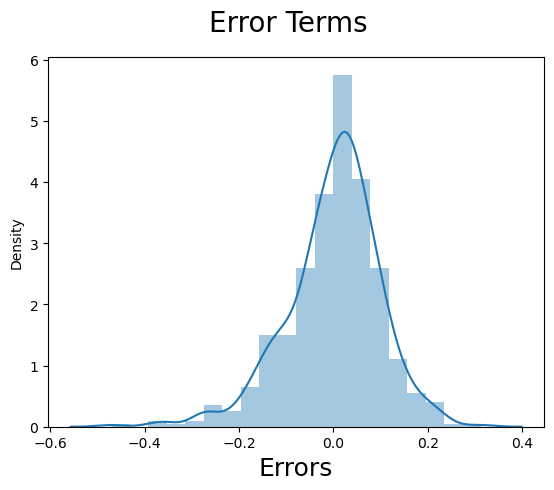

In [527]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18) 

In [528]:
lm_final = lm

##### The error terms are fairly distributed so we can surely live with this model. 

### Let's Evaluate the model on Test Data

In [529]:
X_train_final.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'mnth_Sept', 'weathersit_C'],
      dtype='object')

In [530]:
# Scaled variables
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [531]:
df_test

yr  holiday  workingday       temp      hum  windspeed  casual  \
184   0        1           0  29.793347  63.7917   5.459106    3065   
535   1        0           1  32.082500  59.2083   7.625404     872   
299   0        0           1  19.270000  81.2917  13.250121     240   
221   0        0           1  31.433347  42.4167  13.417286     884   
152   0        0           1  29.315000  30.5000  19.583229     736   
..   ..      ...         ...        ...      ...        ...     ...   
400   1        0           0  10.899153  68.7917  11.791732     318   
702   1        0           1  19.509153  73.3750  11.666643     551   
127   0        0           0  21.661653  63.1667   5.000712    1401   
640   1        0           1  26.957500  79.3750   4.458569     728   
72    0        0           1  13.333897  49.6957   9.174042     359   

     registered   cnt  season_spring  season_summer  season_winter  mnth_Aug  \
184        2978  6043              0              0              0         0   
535        5339  6211              0              1              0         0   
299        2419  2659              0              0              1         0   
221        3896  4780              0              0              0         1   
152        4232  4968              0              1              0         0   
..          ...   ...            ...            ...            ...       ...   
400        2629  2947              1              0              0         0   
702        6055  6606              0              0              1         0   
127        2932  4333              0              1              0         0   
640        6844  7572              0              0              1         0   
72         1687  2046              1              0              0         0   

     mnth_Dec  mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
184         0         0         0         1         0         0         0   
535         0         0         0         0         1         0         0   
299         0         0         0         0         0         0         0   
221         0         0         0         0         0         0         0   
152         0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
400         0         1         0         0         0         0         0   
702         1         0         0         0         0         0         0   
127         0         0         0         0         0         0         1   
640         0         0         0         0         0         0         0   
72          0         0         0         0         0         1         0   

     mnth_Nov  mnth_Oct  mnth_Sept  weekday_Mon  weekday_Sat  weekday_Sun  \
184         0         0          0            0            0            0   
535         0         0          0            0            0            0   
299         0         1          0            0            1            0   
221         0         0          0            0            0            0   
152         0         0          0            0            1            0   
..        ...       ...        ...          ...          ...          ...   
400         0         0          0            0            0            0   
702         0         0          0            0            0            0   
127         0         0          0            0            0            0   
640         0         1          0            0            0            0   
72          0         0          0            0            0            0   

     weekday_Thurs  weekday_Tues  weekday_Wed  weathersit_B  weathersit_C  
184              0             0            1             1             0  
535              0             0            0             0             0  
299              0             0            0             1             0  
221              0             0     

In [532]:
df_test[var] = scaler.transform(df_test[var])

In [533]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [534]:
X_test.head()

yr  holiday  workingday      temp       hum  windspeed  season_spring  \
184   0        1           0  0.831783  0.657364   0.084219              0   
535   1        0           1  0.901354  0.610133   0.153728              0   
299   0        0           1  0.511964  0.837699   0.334206              0   
221   0        0           1  0.881625  0.437098   0.339570              0   
152   0        0           1  0.817246  0.314298   0.537414              0   

     season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  mnth_Jan  \
184              0              0         0         0         0         0   
535              1              0         0         0         0         0   
299              0              1         0         0         0         0   
221              0              0         1         0         0         0   
152              1              0         0         0         0         0   

     mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sept  \
184         1         0         0         0         0         0          0   
535         0         1         0         0         0         0          0   
299         0         0         0         0         0         1          0   
221         0         0         0         0         0         0          0   
152         0         1         0         0         0         0          0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thurs  weekday_Tues  \
184            0            0            0              0             0   
535            0            0            0              0             0   
299            0            1            0              0             0   
221            0            0            0              0             0   
152            0            1            0              0             0   

     weekday_Wed  weathersit_B  weathersit_C  
184            1             1             0  
535            0             0             0  
299            0             1             0  
221            0             0             0  
152            0             0             0

In [535]:
final_columns = X_train_final.columns
final_columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'mnth_Sept', 'weathersit_C'],
      dtype='object')

In [536]:
# Let's subset these columns and create a new dataframe 'X_test_rfe' usning columns in final Train Model
X_test_rfe = X_test[final_columns]

In [537]:
# Add a constant to the test set 
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    int64  
 6   season_winter  219 non-null    int64  
 7   mnth_Jul       219 non-null    int64  
 8   mnth_Sept      219 non-null    int64  
 9   weathersit_C   219 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 18.8 KB


In [538]:
# Making predictions
y_pred = lm_final.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

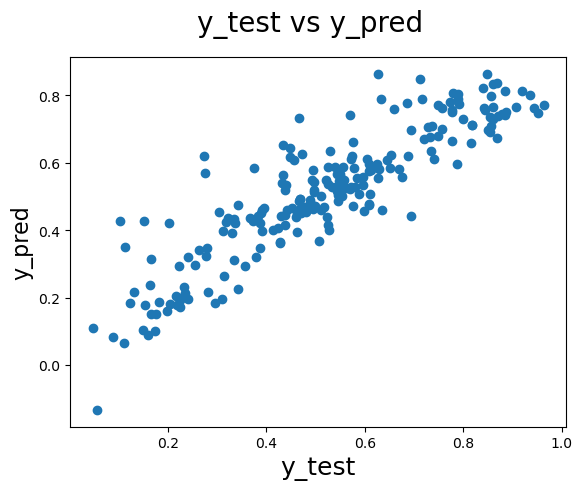

In [539]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

##### From the above plot, it's evident that the model is doing well on the test set as well. 

###### Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [540]:
lm_test = sm.OLS(y_test,X_test_rfe).fit() 

In [541]:
print(lm_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     93.92
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.81e-68
Time:                        09:23:36   Log-Likelihood:                 200.11
No. Observations:                 219   AIC:                            -380.2
Df Residuals:                     209   BIC:                            -346.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2145      0.041      5.283

In [542]:
# r2_score for 9 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045293

### Conclusion

**Thus, for the model with 9 variables, the r-squared on training and test data is about 80.5% and 80.2% respectively. 
The adjusted r-squared on the train set is about is about 80.1% and on test set its 79.3%.**

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(day[final_columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

### So final 9 variables have fairly low correlation and one can use this model for daily Bike Sharing rentals